In [2]:
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pickle4 import pickle
import joblib
from tabulate import tabulate
from tkinter import *
import tkinter.messagebox

In [4]:
dfH = pd.read_csv('C:/Users/admin/OneDrive - gitam.in/Desktop/A12/DATASETS/Hyderabad_rent.csv')
dfD = pd.read_csv('C:/Users/admin/OneDrive - gitam.in/Desktop/A12/DATASETS/Delhi_rent.csv')
dfM = pd.read_csv('C:/Users/admin/OneDrive - gitam.in/Desktop/A12/DATASETS/Mumbai_rent.csv')
dfC = pd.read_csv('C:/Users/admin/OneDrive - gitam.in/Desktop/A12/DATASETS/Chennai_rent.csv')
dfK = pd.read_csv('C:/Users/admin/OneDrive - gitam.in/Desktop/A12/DATASETS/Kolkata_rent.csv')
dfB = pd.read_csv('C:/Users/admin/OneDrive - gitam.in/Desktop/A12/DATASETS/Bangalore_rent.csv')

In [5]:
dfs = [dfH,dfD,dfM,dfC,dfK,dfB]
cities = ['Hyderabad', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bangalore']
for df,city in zip(dfs,cities):
    df['city']=city
    print(city,df.shape)

Hyderabad (10757, 10)
Delhi (33500, 10)
Mumbai (68518, 10)
Chennai (9283, 10)
Kolkata (9900, 10)
Bangalore (23540, 10)


In [6]:
df = pd.concat(dfs)
df.shape

(155498, 10)

In [7]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,"6,720",320.0,Furnished,1 bathrooms,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,"36,000",3000.0,Semi-Furnished,4 bathrooms,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,"11,000",900.0,Semi-Furnished,2 bathrooms,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,"45,000",2165.0,Unfurnished,3 bathrooms,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,"20,000",1600.0,Semi-Furnished,3 bathrooms,Hyderabad


In [8]:
df.describe()

,bedroom,area
count,154437.000000,154437.000000
mean,2.048764,1246.972468
std,0.977934,1104.038100
min,1.000000,3.000000
25%,1.000000,650.000000
50%,2.000000,990.000000
75%,3.000000,1377.000000
max,15.000000,19800.000000


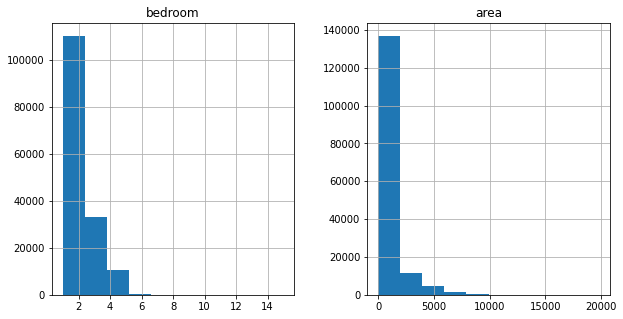

In [9]:
df.hist(figsize = (10,5))
plt.show()

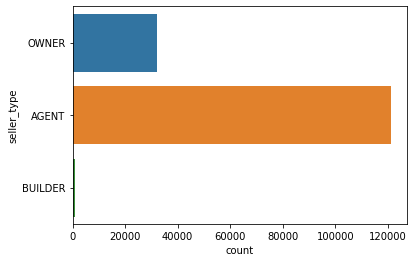

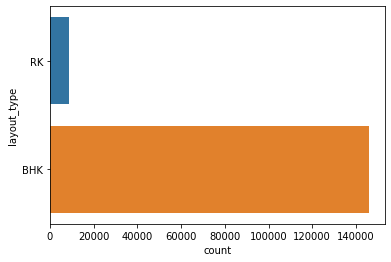

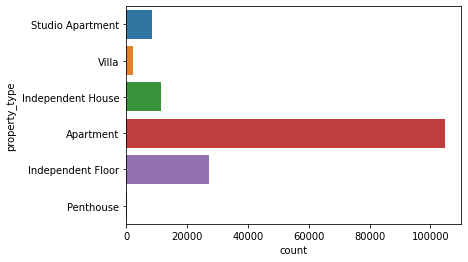

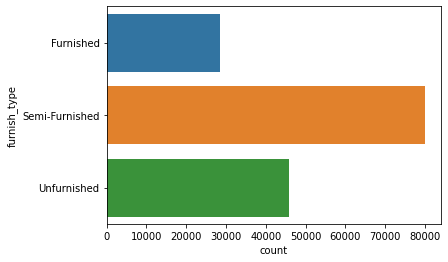

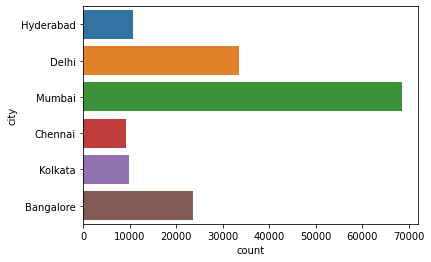

In [10]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155498 entries, 0 to 23539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    154434 non-null  object 
 1   bedroom        154437 non-null  float64
 2   layout_type    154437 non-null  object 
 3   property_type  154437 non-null  object 
 4   locality       154436 non-null  object 
 5   price          154437 non-null  object 
 6   area           154437 non-null  float64
 7   furnish_type   154437 non-null  object 
 8   bathroom       152387 non-null  object 
 9   city           155498 non-null  object 
dtypes: float64(2), object(8)
memory usage: 13.0+ MB


In [12]:
#checking missing values
df.isnull().sum()

seller_type      1064
bedroom          1061
layout_type      1061
property_type    1061
locality         1062
price            1061
area             1061
furnish_type     1061
bathroom         3111
city                0
dtype: int64

In [13]:
df=df.dropna()
df.shape

(152383, 10)

In [14]:
#checking all unique values 
print(df.seller_type.unique())
print(df.seller_type.value_counts())

['OWNER' 'AGENT' 'BUILDER']
AGENT      119819
OWNER       31632
BUILDER       932
Name: seller_type, dtype: int64


In [15]:
print(df.bedroom.unique())
print(df.bedroom.value_counts())

[ 1.  5.  2.  3.  6.  4. 10. 11.  8.  7.  9. 15. 12. 14.]
2.0     59208
1.0     49411
3.0     32901
4.0      9310
5.0      1199
6.0       131
10.0       74
8.0        46
7.0        45
9.0        23
15.0       22
12.0        6
14.0        4
11.0        3
Name: bedroom, dtype: int64


In [16]:
print(df.layout_type.unique())
print(df.layout_type.value_counts())

['RK' 'BHK']
BHK    144188
RK       8195
Name: layout_type, dtype: int64


In [17]:
print(df.property_type.unique())
print(df.property_type.value_counts())

['Studio Apartment' 'Villa' 'Independent House' 'Apartment'
 'Independent Floor' 'Penthouse']
Apartment            103764
Independent Floor     26840
Independent House     11253
Studio Apartment       8195
Villa                  2199
Penthouse               132
Name: property_type, dtype: int64


In [18]:
print(df.furnish_type.unique())
print(df.furnish_type.value_counts())

['Furnished' 'Semi-Furnished' 'Unfurnished']
Semi-Furnished    79129
Unfurnished       45250
Furnished         28004
Name: furnish_type, dtype: int64


In [19]:
print(df.bathroom.unique())
print(df.bathroom.value_counts())

['1 bathrooms' '4 bathrooms' '2 bathrooms' '3 bathrooms' '5 bathrooms'
 'East facing' 'West facing' 'North facing' 'South facing' '6 bathrooms'
 '7 bathrooms' 'Grfloor' '10 bathrooms' '12 bathrooms' '8 bathrooms'
 'NorthWest facing' '4 of 5floor' '9 bathrooms' 'NorthEast facing'
 'SouthEast facing' '16 bathrooms' '14 bathrooms' '15 bathrooms'
 'Gr of 2floor' '3 of 3floor' '4 of 9floor' '3 of 4floor' '2 of 4floor'
 '2 of 3floor' '3 of 5floor' '1 of 3floor' '2 of 5floor'
 'SouthWest facing' 'availability immediately' '2 of 7floor'
 '7 of 12floor' 'Family only' '17 of 29floor' '10 of 16floor'
 '4 of 7floor' '17 of 25floor' '6 of 7floor' '11 of 17floor'
 '15 of 28floor' '5 of 14floor' '6 of 8floor' '9 of 12floor' '3 of 7floor'
 '1 of 4floor' '12 of 16floor' '7 of 16floor' '1 of 6floor' '18 bathrooms'
 '19 bathrooms' '1 of 2floor']
2 bathrooms                 71127
1 bathrooms                 45390
3 bathrooms                 24654
4 bathrooms                  8630
5 bathrooms              

In [20]:
#removing unnecessary values
df=df[df.bathroom.str.contains('bathrooms')]
df.shape

(151962, 10)

In [21]:
print(df.bathroom.unique())
print(df.bathroom.value_counts())

['1 bathrooms' '4 bathrooms' '2 bathrooms' '3 bathrooms' '5 bathrooms'
 '6 bathrooms' '7 bathrooms' '10 bathrooms' '12 bathrooms' '8 bathrooms'
 '9 bathrooms' '16 bathrooms' '14 bathrooms' '15 bathrooms' '18 bathrooms'
 '19 bathrooms']
2 bathrooms     71127
1 bathrooms     45390
3 bathrooms     24654
4 bathrooms      8630
5 bathrooms      1593
6 bathrooms       331
7 bathrooms        74
9 bathrooms        55
8 bathrooms        48
10 bathrooms       34
15 bathrooms        7
16 bathrooms        6
14 bathrooms        6
12 bathrooms        4
19 bathrooms        2
18 bathrooms        1
Name: bathroom, dtype: int64


In [22]:
df['bathroom'] = df['bathroom'].str.replace(r'[^\d.]+', '', regex=True)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,"6,720",320.0,Furnished,1,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,"36,000",3000.0,Semi-Furnished,4,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,"11,000",900.0,Semi-Furnished,2,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,"45,000",2165.0,Unfurnished,3,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,"20,000",1600.0,Semi-Furnished,3,Hyderabad


In [23]:
df['bathroom'] = df['bathroom'].astype('float64', errors = 'raise')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151962 entries, 0 to 23539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    151962 non-null  object 
 1   bedroom        151962 non-null  float64
 2   layout_type    151962 non-null  object 
 3   property_type  151962 non-null  object 
 4   locality       151962 non-null  object 
 5   price          151962 non-null  object 
 6   area           151962 non-null  float64
 7   furnish_type   151962 non-null  object 
 8   bathroom       151962 non-null  float64
 9   city           151962 non-null  object 
dtypes: float64(3), object(7)
memory usage: 12.8+ MB


In [25]:
d = df[df['property_type'] == 'Penthouse'].index
d

Int64Index([ 5892,  6513,  6535,  6692,  6693,  7037,  7066,  7186,  8046,
             8594,
            ...
            17811, 17832, 17836, 17838, 17839, 17857, 17968, 18615, 18991,
            22901],
           dtype='int64', length=132)

In [26]:
df.drop(d, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151601 entries, 0 to 23539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    151601 non-null  object 
 1   bedroom        151601 non-null  float64
 2   layout_type    151601 non-null  object 
 3   property_type  151601 non-null  object 
 4   locality       151601 non-null  object 
 5   price          151601 non-null  object 
 6   area           151601 non-null  float64
 7   furnish_type   151601 non-null  object 
 8   bathroom       151601 non-null  float64
 9   city           151601 non-null  object 
dtypes: float64(3), object(7)
memory usage: 12.7+ MB


In [27]:
df['p2'] = df['price'].apply(lambda x : '0' if ',' in x else '1')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,p2
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,"6,720",320.0,Furnished,1.0,Hyderabad,0
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,"36,000",3000.0,Semi-Furnished,4.0,Hyderabad,0
2,OWNER,2.0,BHK,Independent House,Shaikpet,"11,000",900.0,Semi-Furnished,2.0,Hyderabad,0
3,OWNER,3.0,BHK,Apartment,Nanakramguda,"45,000",2165.0,Unfurnished,3.0,Hyderabad,0
4,OWNER,3.0,BHK,Apartment,Kondapur,"20,000",1600.0,Semi-Furnished,3.0,Hyderabad,0


In [28]:
df['price'] = df['price'].str.replace(r'[^\d.]+', '', regex=True)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,p2
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,6720,320.0,Furnished,1.0,Hyderabad,0
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,36000,3000.0,Semi-Furnished,4.0,Hyderabad,0
2,OWNER,2.0,BHK,Independent House,Shaikpet,11000,900.0,Semi-Furnished,2.0,Hyderabad,0
3,OWNER,3.0,BHK,Apartment,Nanakramguda,45000,2165.0,Unfurnished,3.0,Hyderabad,0
4,OWNER,3.0,BHK,Apartment,Kondapur,20000,1600.0,Semi-Furnished,3.0,Hyderabad,0


In [29]:
df['price'] = df['price'].astype('float64')
df.loc[df.p2.str.contains('1'), 'price'] *= 100000.0
df.drop('p2',axis=1,inplace=True)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,6720.0,320.0,Furnished,1.0,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,36000.0,3000.0,Semi-Furnished,4.0,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,11000.0,900.0,Semi-Furnished,2.0,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,45000.0,2165.0,Unfurnished,3.0,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,20000.0,1600.0,Semi-Furnished,3.0,Hyderabad


In [30]:
inflation = 4.47/100
df['price']=df['price']+(df['price']*inflation*6/12)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,6870.192,320.0,Furnished,1.0,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,36804.600,3000.0,Semi-Furnished,4.0,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,11245.850,900.0,Semi-Furnished,2.0,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,46005.750,2165.0,Unfurnished,3.0,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,20447.000,1600.0,Semi-Furnished,3.0,Hyderabad


In [31]:
df['locality'] = df['locality'].apply(str.lower)

In [32]:
locality_c = df.groupby('locality').size().sort_values(ascending=True)

In [33]:
for i in range(1,11):
    print('no of localities with houses less than ',i,'is ',len(locality_c[locality_c<i]))
    

no of localities with houses less than  1 is  0
no of localities with houses less than  2 is  1027
no of localities with houses less than  3 is  1582
no of localities with houses less than  4 is  1844
no of localities with houses less than  5 is  2008
no of localities with houses less than  6 is  2138
no of localities with houses less than  7 is  2239
no of localities with houses less than  8 is  2308
no of localities with houses less than  9 is  2375
no of localities with houses less than  10 is  2424


In [34]:
loc_10=locality_c[locality_c<7]

In [35]:
df.locality = df.locality.apply(lambda x: 'other' if x in loc_10 else x)

In [36]:
df=df[(df['price']<75000) & (df['bathroom']<7) & (df['bedroom']<7) & (df['area']<10000)]

In [37]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,serilingampally,6870.192,320.0,Furnished,1.0,Hyderabad
1,OWNER,5.0,BHK,Villa,sri nagar colony,36804.600,3000.0,Semi-Furnished,4.0,Hyderabad
2,OWNER,2.0,BHK,Independent House,shaikpet,11245.850,900.0,Semi-Furnished,2.0,Hyderabad
3,OWNER,3.0,BHK,Apartment,nanakramguda,46005.750,2165.0,Unfurnished,3.0,Hyderabad
4,OWNER,3.0,BHK,Apartment,kondapur,20447.000,1600.0,Semi-Furnished,3.0,Hyderabad


In [38]:
df2=df.copy()

In [39]:
# converting categorical data into numeric data
enc=LabelEncoder()

In [40]:
seller_type=enc.fit_transform(df['seller_type'])
layout_type=enc.fit_transform(df['layout_type'])
property_type=enc.fit_transform(df['property_type'])
locality=enc.fit_transform(df['locality'])
furnish_type=enc.fit_transform(df['furnish_type'])
city=enc.fit_transform(df['city'])

In [41]:
df['seller_type']=seller_type
df['layout_type']=layout_type
df['property_type']=property_type
df['locality']=locality
df['furnish_type']=furnish_type
df['city']=city

In [42]:
idx = pd.RangeIndex(start=0, stop=len(df), step=1)
df.index = idx

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132220 entries, 0 to 132219
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    132220 non-null  int32  
 1   bedroom        132220 non-null  float64
 2   layout_type    132220 non-null  int32  
 3   property_type  132220 non-null  int32  
 4   locality       132220 non-null  int32  
 5   price          132220 non-null  float64
 6   area           132220 non-null  float64
 7   furnish_type   132220 non-null  int32  
 8   bathroom       132220 non-null  float64
 9   city           132220 non-null  int32  
dtypes: float64(4), int32(6)
memory usage: 7.1 MB


In [44]:
df.head(10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,2,1.0,1,3,1032,6870.192,320.0,0,1.0,3
1,2,5.0,0,4,1077,36804.600,3000.0,1,4.0,3
2,2,2.0,0,2,1040,11245.850,900.0,1,2.0,3
3,2,3.0,0,0,744,46005.750,2165.0,2,3.0,3
4,2,3.0,0,0,554,20447.000,1600.0,1,3.0,3
5,2,1.0,0,2,658,5111.750,600.0,2,1.0,3
6,2,2.0,0,0,656,12268.200,1165.0,0,2.0,3
7,2,3.0,0,2,442,61341.000,3000.0,1,3.0,3
8,2,2.0,0,1,554,17379.950,900.0,1,2.0,3
9,2,2.0,0,0,554,22491.700,1400.0,1,2.0,3


In [45]:
df.describe()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
count,132220.000000,132220.000000,132220.000000,132220.000000,132220.000000,132220.000000,132220.000000,132220.000000,132220.000000,132220.000000
mean,0.476781,1.855302,0.060770,0.507238,613.010906,24241.501681,973.994834,1.108108,1.822092,3.144766
std,0.848279,0.784687,0.238909,0.912438,355.863048,15501.857612,495.368878,0.666285,0.715753,1.943865
min,0.000000,1.000000,0.000000,0.000000,0.000000,1226.820000,3.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,310.000000,12268.200000,600.000000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,0.000000,0.000000,599.000000,20447.000000,900.000000,1.000000,2.000000,4.000000
75%,0.000000,2.000000,0.000000,1.000000,904.000000,32715.200000,1200.000000,2.000000,2.000000,5.000000
max,2.000000,6.000000,1.000000,4.000000,1237.000000,74631.550000,7000.000000,2.000000,6.000000,5.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132220 entries, 0 to 132219
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    132220 non-null  int32  
 1   bedroom        132220 non-null  float64
 2   layout_type    132220 non-null  int32  
 3   property_type  132220 non-null  int32  
 4   locality       132220 non-null  int32  
 5   price          132220 non-null  float64
 6   area           132220 non-null  float64
 7   furnish_type   132220 non-null  int32  
 8   bathroom       132220 non-null  float64
 9   city           132220 non-null  int32  
dtypes: float64(4), int32(6)
memory usage: 7.1 MB


In [47]:
#After Data Preprocessing

In [48]:
df.shape

(132220, 10)

In [49]:
df.corr()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
seller_type,1.000000,-0.034635,0.072962,0.250540,0.001767,-0.283165,-0.054221,0.050179,-0.102503,-0.288936
bedroom,-0.034635,1.000000,-0.277177,-0.165683,0.075980,0.487996,0.802696,-0.118255,0.791860,-0.173075
layout_type,0.072962,-0.277177,1.000000,0.694924,-0.008871,-0.213222,-0.296756,0.021160,-0.272431,0.022325
property_type,0.250540,-0.165683,0.694924,1.000000,0.009879,-0.272940,-0.159630,0.001537,-0.220154,-0.282801
locality,0.001767,0.075980,-0.008871,0.009879,1.000000,-0.082606,0.058483,-0.010646,0.052402,-0.050140
price,-0.283165,0.487996,-0.213222,-0.272940,-0.082606,1.000000,0.516461,-0.267975,0.530335,0.213709
area,-0.054221,0.802696,-0.296756,-0.159630,0.058483,0.516461,1.000000,-0.152711,0.743415,-0.209197
furnish_type,0.050179,-0.118255,0.021160,0.001537,-0.010646,-0.267975,-0.152711,1.000000,-0.115471,0.154262
bathroom,-0.102503,0.791860,-0.272431,-0.220154,0.052402,0.530335,0.743415,-0.115471,1.000000,-0.052874
city,-0.288936,-0.173075,0.022325,-0.282801,-0.050140,0.213709,-0.209197,0.154262,-0.052874,1.000000


In [50]:
# Making data suitable for ML algorithms 

In [51]:
X = df.drop(['price'], axis=1)
y = df['price']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [53]:
print('X train - ',X_train.shape)
print('Y train - ',y_train.shape)
print('X test - ',X_test.shape)
print('Y test - ',y_test.shape)

X train -  (99165, 9)
Y train -  (99165,)
X test -  (33055, 9)
Y test -  (33055,)


In [54]:
# Algorithms 

In [55]:
def mae (y_true, y_pred):
    return (np.mean(abs(y_true-y_pred)))

In [56]:
def nrmse (y_true, y_pred):
    return (math.sqrt(np.square(np.subtract(y_true,y_pred)).mean()))/75000

In [57]:
mod=[]
header=['Algorithm', 'MAE', 'NRMSE', 'R2 score']

In [58]:
def model_test(model,name):
    model.fit(X_train.values,y_train)
    predic = model.predict(X_test.values)
    MAE=round(mae(y_test,predic),3)
    norm_rmse=round(nrmse(y_test,predic),3)
    r2s=round(r2_score(y_test,predic),3)
    l1=[name,MAE,norm_rmse,r2s]
    mod.append(l1)
    print('MAE : ', MAE)
    print('Normalized RMSE : ',norm_rmse)
    print('R2 Score : ',r2s)

In [59]:
lr = LinearRegression()
model_test(lr,'Linear Regression')

MAE :  8380.815
Normalized RMSE :  0.148
R2 Score :  0.491


In [60]:
knn = KNeighborsRegressor(n_neighbors=5)
model_test(knn, 'KNeighborsRegressor')

MAE :  4528.424
Normalized RMSE :  0.103
R2 Score :  0.751


In [61]:
gb = GradientBoostingRegressor(random_state=12)
model_test(gb,'GradientBoostingRegressor')

MAE :  6130.755
Normalized RMSE :  0.114
R2 Score :  0.698


In [62]:
tree = DecisionTreeRegressor(random_state=12)
model_test(tree,'DecisionTreeRegressor')

MAE :  3172.228
Normalized RMSE :  0.084
R2 Score :  0.833


In [63]:
rf = RandomForestRegressor(random_state=12)
model_test(rf,'RandomForestRegressor')

MAE :  3087.155
Normalized RMSE :  0.073
R2 Score :  0.874


In [64]:
xgb = xgb.XGBRegressor(objective='reg:squarederror',random_state=12)
model_test(xgb,'XGBRegressor')

MAE :  4084.234
Normalized RMSE :  0.081
R2 Score :  0.848


In [65]:
print(tabulate(mod, headers=header))

Algorithm                      MAE    NRMSE    R2 score
-------------------------  -------  -------  ----------
Linear Regression          8380.82    0.148       0.491
KNeighborsRegressor        4528.42    0.103       0.751
GradientBoostingRegressor  6130.76    0.114       0.698
DecisionTreeRegressor      3172.23    0.084       0.833
RandomForestRegressor      3087.16    0.073       0.874
XGBRegressor               4084.23    0.081       0.848


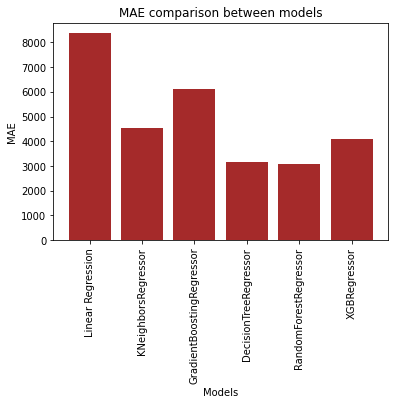

In [66]:
Model_names = [model[0] for model in mod]
MAE = [model[1] for model in mod]

plt.bar(Model_names, MAE , color='brown')

plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE comparison between models')
plt.show()

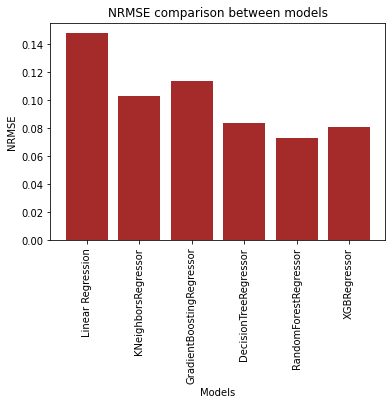

In [67]:
Model_names = [model[0] for model in mod]
NRMSE = [model[2] for model in mod]

plt.bar(Model_names, NRMSE , color='brown')

plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('NRMSE')
plt.title('NRMSE comparison between models')
plt.show()

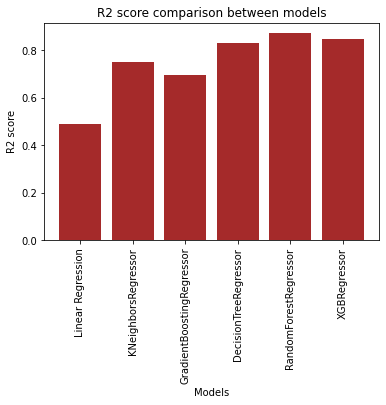

In [68]:
Model_names = [model[0] for model in mod]
R2_score = [model[3] for model in mod]

plt.bar(Model_names, R2_score , color='brown')

plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('R2 score')
plt.title('R2 score comparison between models')
plt.show()

In [69]:
def pred(seller,bed_c,layout_,propertytyp,localit,area_c,furnish,bath_c,city_):
    
    localit=localit.lower()
    if localit in df2['locality'].values:
        locality_index=df2.index[df2['locality']==localit][0]
        locality_c= df.at[locality_index, 'locality']
    else:
        locality_c=695


    seller_dict = {'Agent': 0, 'Builder': 1, 'Owner': 2}
    seller_c = seller_dict[seller]
    
    layout_dict = {'RK': 0, 'BHK': 1}
    layout_c = layout_dict[layout_]
    
    property_dict = {'Villa': 4, 'Independent House': 2, 'Apartment': 0, 'Independent Floor': 1, 'Studio Apartment': 3}
    property_c = property_dict[propertytyp]
     
    furnish_dict = {'Furnished': 0, 'Semifurnished': 1, 'Unfurnished': 2}
    furnish_c = furnish_dict[furnish]
    
    city_dict = {'Hyderabad': 3, 'Delhi': 2, 'Mumbai': 5, 'Chennai': 1, 'Kolkata': 4, 'Bangalore': 0}
    city_c = city_dict[city_]

    final_pred=[seller_c,bed_c,layout_c,property_c,locality_c,area_c,furnish_c,bath_c,city_c]
    rent = round(rf.predict([final_pred])[0])
    return rent
    

In [70]:
pred('Agent',3,'BHK','Apartment','miyapur',2000,'Unfurnished',3,'Hyderabad')

31665

In [71]:
pred('Agent',3,'BHK','Independent House','Andheri',1800,'Furnished',3,'Mumbai')

56283

In [72]:
pred('Agent',5,'BHK','Villa','KPHB',2200,'Unfurnished',4,'Hyderabad')

36319

In [73]:
pred('Builder',2,'BHK','Apartment','Ameerpet', 1200,'Semifurnished',2,'Hyderabad')

15240

In [74]:
pred('Owner',1,'RK','Apartment','SR Nagar',900,'Semifurnished',1,'Hyderabad')

10979

In [75]:
# converting the model to byte stream data
with open('model.joblib', 'wb') as file:
    joblib.dump(rf, file)

In [76]:
window = Tk()
window.title('A12 BATCH')
window.geometry("250x500")

seller_type_label = Label(window, text="Seller Type")
seller_type_label.grid(row=1, column=0)
seller_type_option = OptionMenu(window, StringVar(value="Agent"), "Builder", "Agent", "Owner")
seller_type_option.grid(row=1, column=1)

bedroom_label = Label(window, text="Bedrooms",anchor='w')
bedroom_label.grid(row=2, column=0)
bedroom_option = OptionMenu(window, StringVar(value="1"), "1", "2", "3", "4", "5", "6", "7")
bedroom_option.grid(row=2, column=1)

layout_label = Label(window, text="Layout Type")
layout_label.grid(row=3, column=0)
layout_option = OptionMenu(window, StringVar(value="BHK"), "RK", "BHK")
layout_option.grid(row=3, column=1)

property_type_label = Label(window, text="Property Type")
property_type_label.grid(row=4, column=0)
property_type_option = OptionMenu(window, StringVar(value="Apartment"), "Villa", "Independent House", "Apartment", "Independent Floor", "Studio Apartment")
property_type_option.grid(row=4, column=1)

locality_label = Label(window, text="Locality")
locality_label.grid(row=5, column=0)
locality_input = Entry(window)
locality_input.grid(row=5, column=1)

area_label = Label(window, text="Area in sqft")
area_label.grid(row=6, column=0)
area_input = Entry(window)
area_input.grid(row=6, column=1)

furnish_type_label = Label(window, text="Furnish Type")
furnish_type_label.grid(row=7, column=0)
furnish_type_option = OptionMenu(window, StringVar(value="Unfurnished"), "Furnished", "Semifurnished", "Unfurnished")
furnish_type_option.grid(row=7, column=1)

bathroom_label = Label(window, text="Bathroom")
bathroom_label.grid(row=8, column=0)
bathroom_option = OptionMenu(window, StringVar(value="1"), "1", "2", "3", "4", "5", "6", "7")
bathroom_option.grid(row=8, column=1)

city_label = Label(window, text="City")
city_label.grid(row=9, column=0)
city_option = OptionMenu(window, StringVar(value="Hyderabad"), "Hyderabad", "Mumbai", "Chennai", "Kolkata", "Bangalore", "Delhi")
city_option.grid(row=9, column=1)

def get_input():
    seller_type = seller_type_option.cget("text")
    bedroom = int(bedroom_option.cget("text"))
    layout_type = layout_option.cget("text")
    property_type = property_type_option.cget("text")
    locality = locality_input.get()
    area = float(area_input.get())
    furnish_type = furnish_type_option.cget("text")
    city = city_option.cget("text")
    bathroom = int(bathroom_option.cget("text"))
    result1=pred(seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom,city)
    return result1
    
def onClick():
    result1=get_input()
    result =f"Predicted rent value is {result1}"
    tkinter.messagebox.showinfo("Prediction",result)   
  
button = Button(window, text="Predict",bg='lightgreen', command=onClick).place(x=100, y=370)

label = Label(window)

window.mainloop()

In [77]:
def hybrid(model1,model2):
    dict1={}
    mod1=model1.predict(X_test.values)
    mod2=model2.predict(X_test.values)
    for i in range(0,101):
        hybmod=((mod1*i)+(mod2*(100-i)))/100
        dict1[i]=r2_score(y_test,hybmod)
    ratio = max(dict1, key=dict1.get)
    return ratio

In [78]:
def hybrid_test(model1,model2):
    t=hybrid(model1,model2)
    mod1=model1.predict(X_test.values)
    mod2=model2.predict(X_test.values)    
    mod=(mod1*t+mod2*(100-t))/100
    print('MAE',mae(y_test,mod))
    print('NRMSE', nrmse(y_test,mod))
    print('R2 Score',round(r2_score(y_test,mod),3))

In [79]:
hybrid_test(rf,xgb)

MAE 3256.173904141417
NRMSE 0.0713886172032884
R2 Score 0.881
